<a href="https://colab.research.google.com/github/RohanMacherla/CNN_Micro_Project/blob/main/FruitClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Mount Google Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Extract The Zip File(project.zip)**

In [ ]:
# #extracting Zip File
# import zipfile
# with zipfile.ZipFile('/content/drive/MyDrive/project.zip', 'r') as zip_ref:
#     zip_ref.extractall('/content/drive/MyDrive/fruitClassification')


**Indentifying Number of Classes**

In [ ]:
import os
files_list=os.listdir("/content/drive/MyDrive/fruitClassification/train/train")#method is used to count number of files
#count number of files
num_files=len(files_list)


In [ ]:
print(num_files)

33


**Split The data into train,test, validation and segregate the images based on test, train, validation**

In [ ]:
import os, shutil
from pathlib import Path
original_dir = Path("/content/drive/MyDrive/fruitClassification/train/train")
new_base_dir = Path("/content/drive/MyDrive/segregated_fruits")
splits = ["train", "validation", "test"]
train_split = 0.7
val_split = 0.15
test_split = 0.15
for fruit_class in os.listdir(original_dir):
    class_path = original_dir / fruit_class
    images = sorted(os.listdir(class_path))
    #It will calculate how many images will go into splits
    total = len(images)
    train_end = int(train_split * total)
    val_end = train_end + int(val_split * total)

    split_ranges = {
        "train": images[:train_end],
        "validation": images[train_end:val_end],
        "test": images[val_end:]
    }

    for split in splits:
        split_dir = new_base_dir / split / fruit_class
        split_dir.mkdir(parents=True, exist_ok=True)

        for fname in split_ranges[split]:
            src = class_path / fname
            dst = split_dir / fname
            shutil.copyfile(src, dst)

**Extracting the images from the segregated dir for each sub dir(train,test, validation) and resizing it and converting it into batches(32)**
-->Identify the classes and print them<br>
--> Assign labels with the batch size

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
base_dir = "/content/drive/MyDrive/segregated_fruits"
img_size = (224, 224)
batch_size = 32
train_ds = tf.keras.utils.image_dataset_from_directory(
    directory=base_dir + '/train',
    image_size=img_size,
    batch_size=batch_size,
    label_mode='int'  # required for sparse_categorical_crossentropy
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    directory=base_dir + '/validation',
    image_size=img_size,
    batch_size=batch_size,
    label_mode='int'
)

test_ds = tf.keras.utils.image_dataset_from_directory(
    directory=base_dir + '/test',
    image_size=img_size,
    batch_size=batch_size,
    label_mode='int'
)
class_names = train_ds.class_names
num_classes = len(class_names)
print(f"Detected {num_classes} fruit classes:", class_names)

Found 11787 files belonging to 33 classes.
Found 2508 files belonging to 33 classes.
Found 2559 files belonging to 33 classes.
Detected 33 fruit classes: ['Apple Braeburn', 'Apple Granny Smith', 'Apricot', 'Avocado', 'Banana', 'Blueberry', 'Cactus fruit', 'Cantaloupe', 'Cherry', 'Clementine', 'Corn', 'Cucumber Ripe', 'Grape Blue', 'Kiwi', 'Lemon', 'Limes', 'Mango', 'Onion White', 'Orange', 'Papaya', 'Passion Fruit', 'Peach', 'Pear', 'Pepper Green', 'Pepper Red', 'Pineapple', 'Plum', 'Pomegranate', 'Potato Red', 'Raspberry', 'Strawberry', 'Tomato', 'Watermelon']


In [ ]:
class_names = train_ds.class_names
print(class_names)
print("Total classes:", len(class_names))

['Apple Braeburn', 'Apple Granny Smith', 'Apricot', 'Avocado', 'Banana', 'Blueberry', 'Cactus fruit', 'Cantaloupe', 'Cherry', 'Clementine', 'Corn', 'Cucumber Ripe', 'Grape Blue', 'Kiwi', 'Lemon', 'Limes', 'Mango', 'Onion White', 'Orange', 'Papaya', 'Passion Fruit', 'Peach', 'Pear', 'Pepper Green', 'Pepper Red', 'Pineapple', 'Plum', 'Pomegranate', 'Potato Red', 'Raspberry', 'Strawberry', 'Tomato', 'Watermelon']
Total classes: 33


In [ ]:
for images, labels in train_ds.take(1):
    print("Image batch shape:", images.shape)
    print("Label batch shape:", labels.shape)

Image batch shape: (32, 224, 224, 3)
Label batch shape: (32,)


In [ ]:
for images,labels in train_ds.take(1):
    print("Image batch shape:", images.shape)

Image batch shape: (32, 224, 224, 3)


In [ ]:
for images, labels in train_ds.take(1):
    print("Labels (as integers):", labels.numpy())


Labels (as integers): [17 22  6 19  1 13 16 19 27 22 32 24 31 21 23 26 14 25  0 28 27  0 25  6
  0 23 10 28  6 29 32 26]


**It creates the normalization layer by scaling it with 255(by default it will have from 0-255(it works with normalized inputs scaled to 0.0,1.0)**<br>
**Every pixel is divided with 255**<br>
**normalization_layer is done on all the labels in train_ds, val_ds, test_ds**

In [ ]:
normalization_layer = tf.keras.layers.Rescaling(1./255)
train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y))
test_ds = test_ds.map(lambda x, y: (normalization_layer(x), y))





*   Cnn/AlexNet/ResNet Works on large dataset where as transfer learning it is a pre-trained model which can work on small to medium level datasets<br>

*   By using the cnn/AlexNet/ResNet for training small datasets may cause overfitting and as we use pre-trained model the model identifies the patterns reduce overfitting<br>

*   Since training using Cnn/AlexNet/ResNet it takes longer time as it initilizes random weights in transfer learning we use pre-trained with few trainable params for faster convergence <br>






In [ ]:
from keras.applications import MobileNetV2
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.optimizers import Adam
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224,224,3))
for layer in base_model.layers:
    layer.trainable = False
    model = Sequential()
    model.add(base_model)
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(33, activation='softmax'))  # 33 classes in fruit dataset
    model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
model.summary()

Model: "sequential_154"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_154 (Flatten)           │ (None, 62720)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_462 (Dense)               │ (None, 256)            │    16,056,576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_154 (Dropout)           │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_463 (Dense)               │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_464 (Dense)               │ (None, 33)             │         4,257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,351,713 (70.01 MB)

 Trainable params: 16,093,729 (61.39 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

In [ ]:
checkpoint = tf.keras.callbacks.ModelCheckpoint(
    filepath='best_model.h5',
    monitor='val_loss',
    save_best_only=True
)

In [ ]:
histroy = model.fit(train_ds, epochs=10, validation_data=val_ds, callbacks=[early_stopping, checkpoint])

Epoch 1/10
369/369 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step - accuracy: 0.7387 - loss: 0.9956

369/369 ━━━━━━━━━━━━━━━━━━━━ 67s 147ms/step - accuracy: 0.7391 - loss: 0.9939 - val_accuracy: 1.0000 - val_loss: 3.7894e-04
Epoch 2/10
368/369 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.9914 - loss: 0.0312

369/369 ━━━━━━━━━━━━━━━━━━━━ 64s 119ms/step - accuracy: 0.9914 - loss: 0.0312 - val_accuracy: 1.0000 - val_loss: 1.2452e-04
Epoch 3/10
368/369 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - accuracy: 0.9950 - loss: 0.0184

369/369 ━━━━━━━━━━━━━━━━━━━━ 49s 134ms/step - accuracy: 0.9950 - loss: 0.0184 - val_accuracy: 1.0000 - val_loss: 7.3284e-05
Epoch 4/10
368/369 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - accuracy: 0.9936 - loss: 0.0204

369/369 ━━━━━━━━━━━━━━━━━━━━ 79s 125ms/step - accuracy: 0.9936 - loss: 0.0205 - val_accuracy: 1.0000 - val_loss: 7.7728e-06
Epoch 5/10
369/369 ━━━━━━━━━━━━━━━━━━━━ 79s 117ms/step - accuracy: 0.9868 - loss: 0.0430 - val_accuracy: 1.0000 - val_loss: 7.2830e-05
Epoch 6/10
369/369 ━━━━━━━━━━━━━━━━━━━━ 81s 114ms/step - accuracy: 0.9879 - loss: 0.0383 - val_accuracy: 1.0000 - val_loss: 3.7055e-05
Epoch 7/10
368/369 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - accuracy: 0.9955 - loss: 0.0134

369/369 ━━━━━━━━━━━━━━━━━━━━ 43s 117ms/step - accuracy: 0.9955 - loss: 0.0134 - val_accuracy: 1.0000 - val_loss: 6.2051e-07
Epoch 8/10
369/369 ━━━━━━━━━━━━━━━━━━━━ 83s 118ms/step - accuracy: 0.9940 - loss: 0.0201 - val_accuracy: 1.0000 - val_loss: 1.6613e-05
Epoch 9/10
368/369 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - accuracy: 0.9937 - loss: 0.0189

369/369 ━━━━━━━━━━━━━━━━━━━━ 41s 110ms/step - accuracy: 0.9937 - loss: 0.0189 - val_accuracy: 1.0000 - val_loss: 1.1778e-07
Epoch 10/10
368/369 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - accuracy: 0.9936 - loss: 0.0178

369/369 ━━━━━━━━━━━━━━━━━━━━ 42s 111ms/step - accuracy: 0.9936 - loss: 0.0178 - val_accuracy: 1.0000 - val_loss: 7.2865e-08


In [ ]:
model.evaluate(test_ds)

80/80 ━━━━━━━━━━━━━━━━━━━━ 11s 142ms/step - accuracy: 1.0000 - loss: 1.2069e-07


[1.8359703801706928e-07, 1.0]

In [ ]:
model.evaluate(val_ds)

79/79 ━━━━━━━━━━━━━━━━━━━━ 7s 90ms/step - accuracy: 1.0000 - loss: 5.1893e-08


[7.28645943581796e-08, 1.0]

In [ ]:
model.evaluate(train_ds)

369/369 ━━━━━━━━━━━━━━━━━━━━ 36s 98ms/step - accuracy: 1.0000 - loss: 4.8011e-08


[6.142353470295348e-08, 1.0]

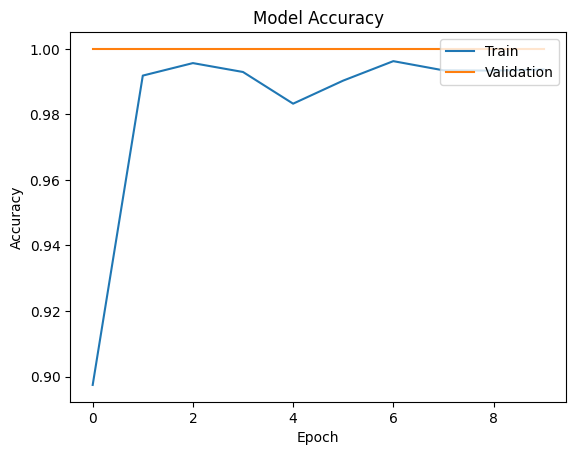

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
plt.plot(histroy.history['accuracy'])
plt.plot(histroy.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

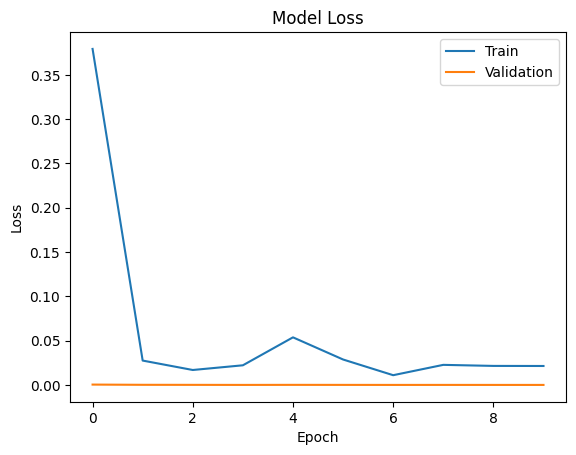

In [ ]:
plt.plot(histroy.history['loss'])
plt.plot(histroy.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

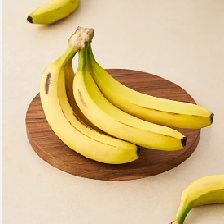

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
Predicted class: Banana


In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np
from IPython.display import display

img_path = "/content/Screenshot 2025-07-15 220415.png"
img = image.load_img(img_path, target_size=(224, 224))

# Display the image being predicted
display(img)

img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) / 255.0

pred = model.predict(img_array)
predicted_class = class_names[np.argmax(pred)]
print("Predicted class:", predicted_class)

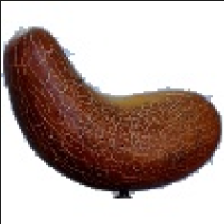

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Predicted class: Cucumber Ripe


In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np
from IPython.display import display

img_path = "/content/Screenshot 2025-07-16 100556.png"
img = image.load_img(img_path, target_size=(224, 224))
display(img)

img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) / 255.0

pred = model.predict(img_array)
predicted_class = class_names[np.argmax(pred)]
print("Predicted class:", predicted_class)

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


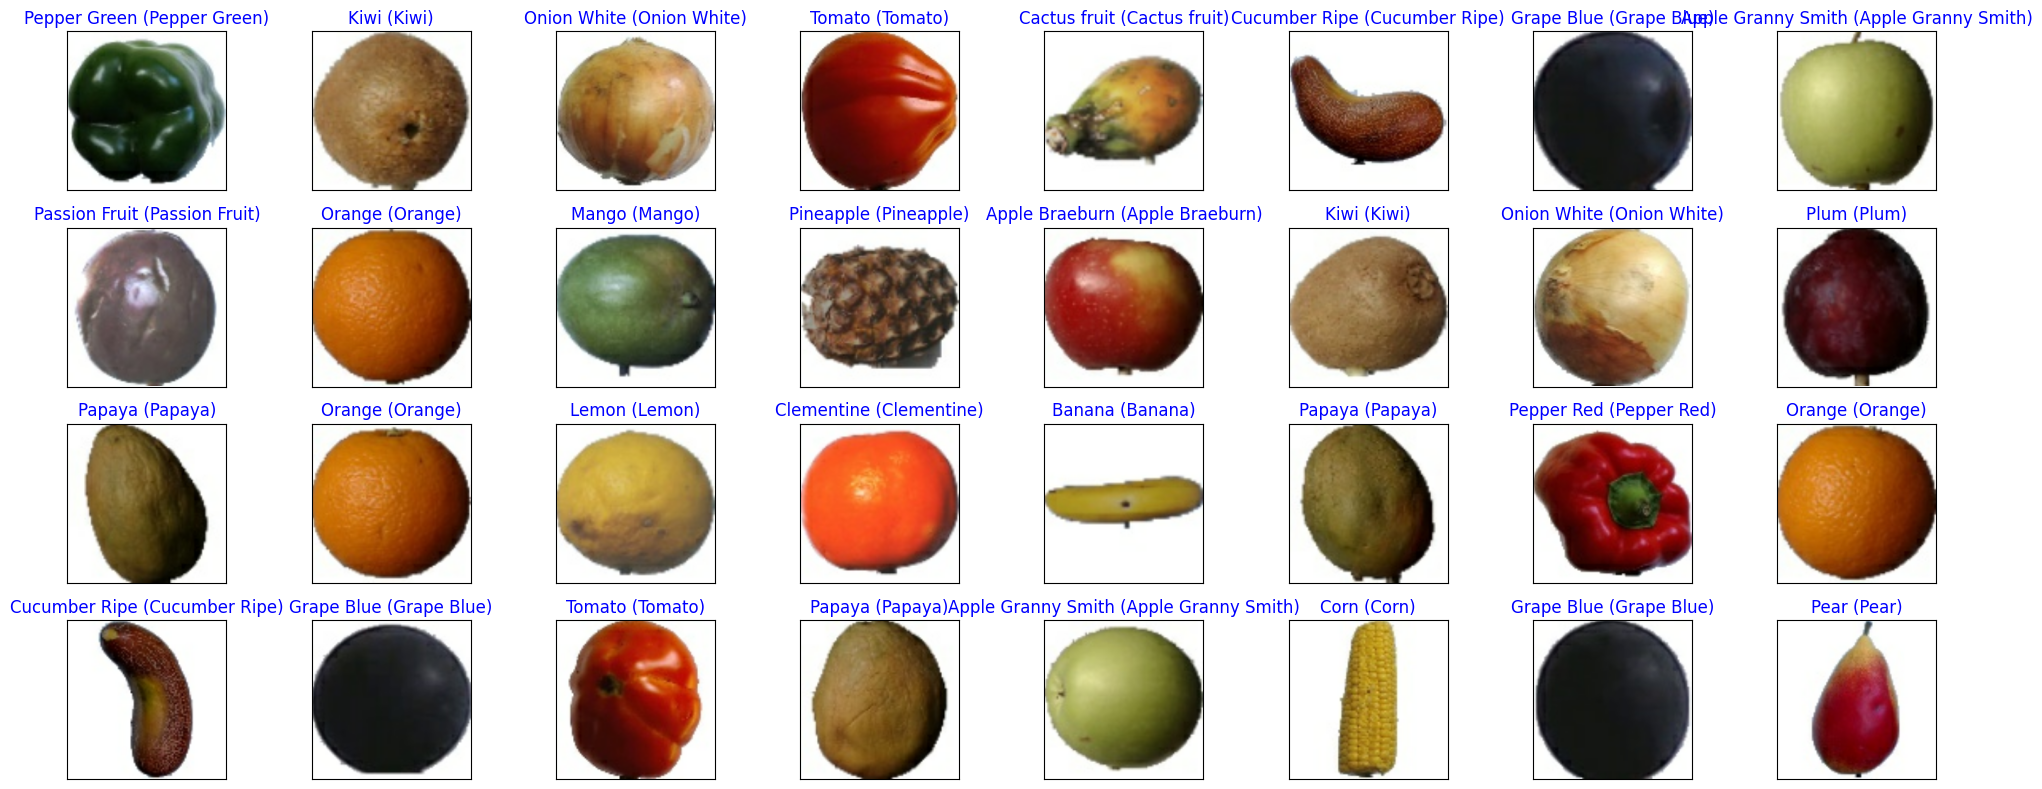

In [ ]:
#Plot a random sample of test images, their predicted label and the ground truth
fig = plt.figure(figsize=(20,8))

# Get one batch from the test dataset
for images, labels in test_ds.take(1):
    # Convert tensors to numpy arrays
    images = images.numpy()
    labels = labels.numpy()

    # Get predictions for the batch
    predictions = model.predict(images)
    predicted_labels = np.argmax(predictions, axis=1)

    for i in range(min(32, images.shape[0])): # Plot up to 32 images
        ax = fig.add_subplot(4, 8, i + 1, xticks=[], yticks=[])
        ax.imshow(images[i])

        pred_label = class_names[predicted_labels[i]]
        true_label = class_names[labels[i]]

        ax.set_title("{} ({})".format(pred_label, true_label), color=("blue" if pred_label == true_label else "red"))

plt.tight_layout()
plt.show()

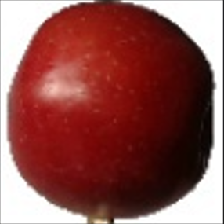

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Predicted class: Apple Braeburn


In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np
from IPython.display import display

img_path = "/content/Screenshot 2025-07-16 101422.png"
img = image.load_img(img_path, target_size=(224, 224))
display(img)

img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) / 255.0

pred = model.predict(img_array)
predicted_class = class_names[np.argmax(pred)]
print("Predicted class:", predicted_class)